In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
table = pd.read_table('asu2.tsv', skiprows = 41)

In [3]:
datos = table.drop(table.index[0:2])

In [4]:
datos

,_RAJ2000,_DEJ2000,ID,RAJ2000,DEJ2000,Rsun,Rgc,X,Y,Z,c
2,006.021667,-72.080833,NGC 104,00 24 05.2,-72 04 51,4.3,7.3,1.8,-2.5,-3.0,2.04
3,013.197917,-26.590000,NGC 288,00 52 47.5,-26 35 24,8.1,11.4,-0.1,0.0,-8.1,0.96
4,015.809583,-70.848333,NGC 362,01 03 14.3,-70 50 54,8.3,9.2,3.0,-4.9,-6.0,1.94
5,048.063750,-55.216944,NGC 1261,03 12 15.3,-55 13 01,16.0,17.9,0.1,-9.8,-12.6,1.27
6,053.345833,+79.580556,Pal 1,03 33 23.0,+79 34 50,9.7,15.9,-5.9,7.0,3.2,1.50
...,...,...,...,...,...,...,...,...,...,...,...
142,323.372083,-0.823056,NGC 7089,21 33 29.3,-00 49 23,11.4,10.3,5.5,7.4,-6.7,1.80
143,325.091667,-23.179167,NGC 7099,21 40 22.0,-23 10 45,7.9,7.0,4.8,2.5,-5.7,2.50
144,326.661667,-21.250833,Pal 12,21 46 38.8,-21 15 03,18.7,15.5,10.8,6.4,-13.8,1.94
145,346.685000,+12.771944,Pal 13,23 06 44.4,+12 46 19,26.3,27.2,1.0,19.3,-17.9,0.66


In [5]:
from astropy import units as u
from astropy.coordinates import SkyCoord

def ra_transf(x):
    x = x.split()
    x = x[0]+'h'+x[1]+'m'+x[2]+'s'
    return x


ras = np.zeros_like(datos['RAJ2000'])

for i,p in enumerate(datos['RAJ2000']):
    ras[i] = ra_transf(p)

In [6]:
def dec_transf(x):
    x = x.split()
    x = x[0]+'d'+x[1]+'m'+x[2]+'s'
    return x

decs = np.zeros_like(datos['DEJ2000'])

for i,p in enumerate(datos['DEJ2000']):
    decs[i] = dec_transf(p)

In [7]:
c = []
for i in range(len(decs)):
    c.append(SkyCoord(ras[i], decs[i]))

In [8]:
ra = datos['_RAJ2000'].astype(float)
dec = datos['_DEJ2000'].astype(float)
dis = datos['Rsun'].astype(float)

RA = []
DEC = []
DIS = []

for i in range(len(datos)):
    RA.append(ra[i+2])
    DEC.append(dec[i+2])
    DIS.append(dis[i+2])

In [9]:
h = []
for i in range(len(RA)):
    h.append(SkyCoord(ra = RA[i]*u.degree,dec = DEC[i]*u.degree, distance = DIS[i]*u.kpc))

In [10]:
x = []
y = []
z = []

for i in range(len(h)):
    x.append(h[i].cartesian.x.value)
    y.append(h[i].cartesian.y.value)
    z.append(h[i].cartesian.z.value)

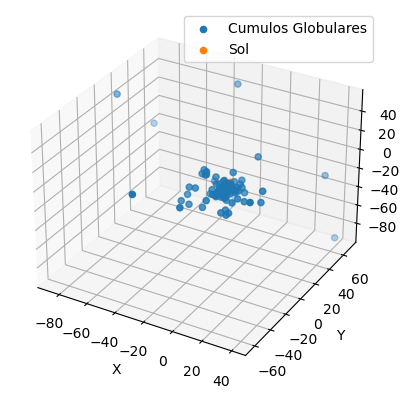

In [11]:
#%matplotlib notebook
ax = plt.figure().add_subplot(projection='3d')

ax.scatter(x,y,z, label="Cumulos Globulares")
ax.scatter(0,0,0, label="Sol")

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()

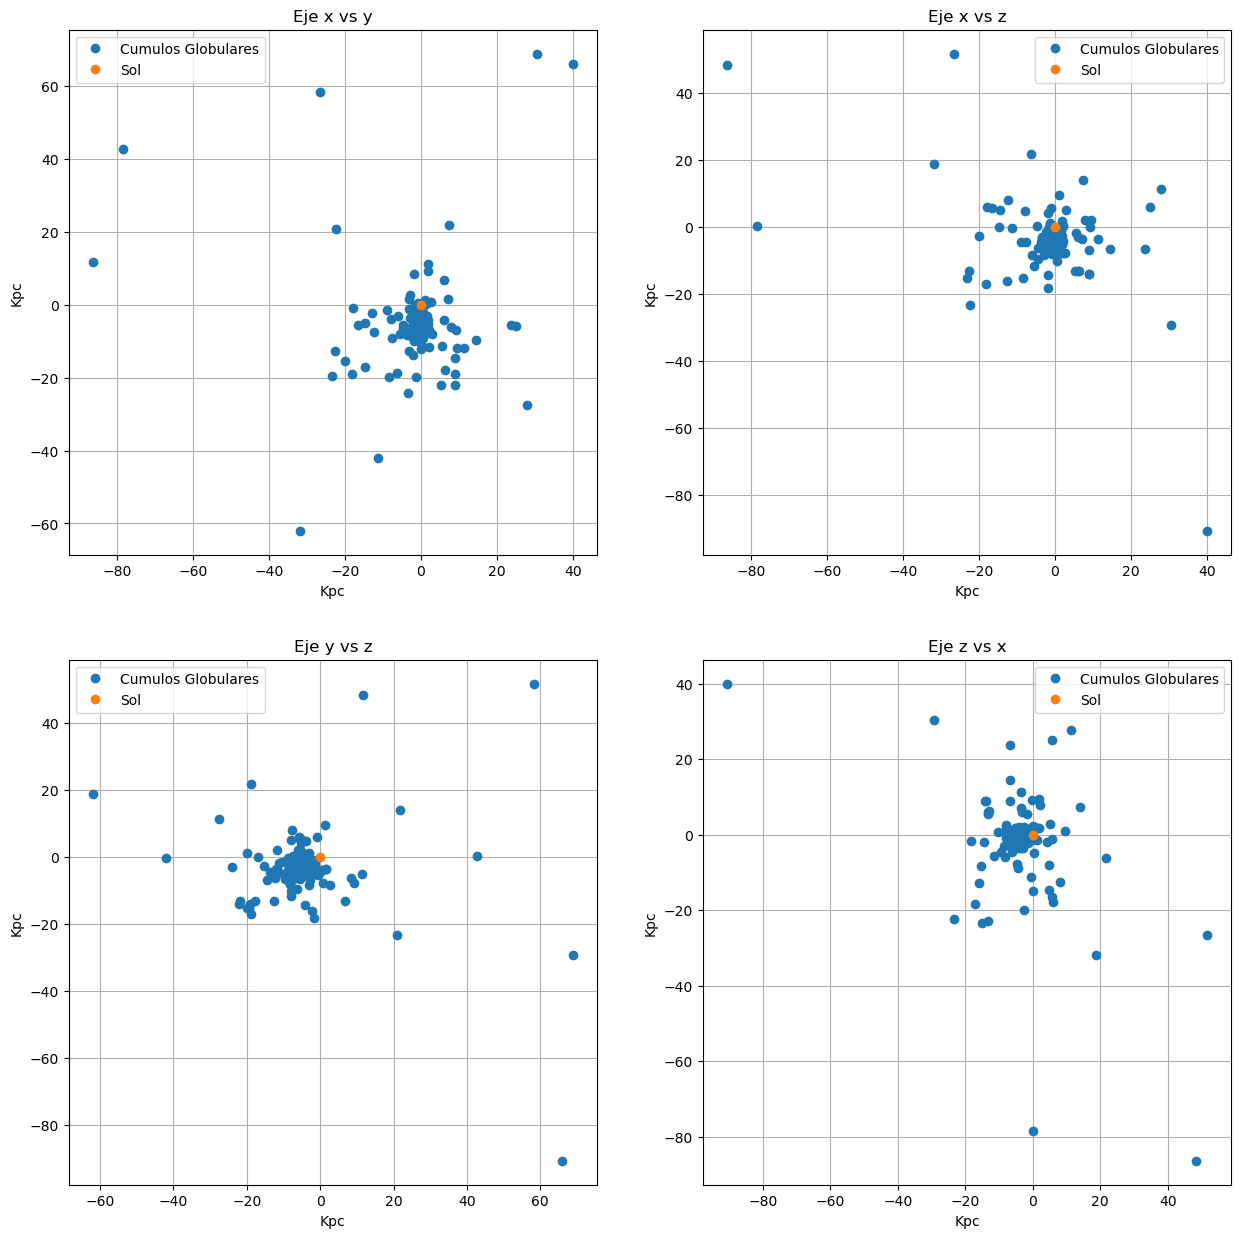

In [23]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
axs[0, 0].plot(x, y, 'o', label = 'Cumulos Globulares')
axs[0, 0].plot(0,0, 'o', label = 'Sol')
axs[0, 0].set_title('Eje x vs y')
axs[0, 0].set_xlabel('Kpc')
axs[0, 0].set_ylabel('Kpc')
axs[0, 0].legend()

axs[0, 1].plot(x, z, 'o', label = 'Cumulos Globulares')
axs[0, 1].plot(0, 0, 'o', label = 'Sol')
axs[0, 1].set_title('Eje x vs z')
axs[0, 1].set_xlabel('Kpc')
axs[0, 1].set_ylabel('Kpc')
axs[0, 1].legend()



axs[1, 0].plot(y, z, 'o', label = 'Cumulos Globulares')
axs[1, 0].plot(0, 0, 'o', label = 'Sol')
axs[1, 0].set_title('Eje y vs z')
axs[1, 0].set_xlabel('Kpc')
axs[1, 0].set_ylabel('Kpc')
axs[1, 0].legend()



axs[1, 1].plot(z, x, 'o', label = 'Cumulos Globulares')
axs[1, 1].set_title('Eje z vs x')
axs[1, 1].plot(0, 0, 'o', label = 'Sol')
axs[1, 1].set_xlabel('Kpc')
axs[1, 1].set_ylabel('Kpc')
axs[1, 1].legend()

axs[0,0].grid()
axs[1,0].grid()
axs[0,1].grid()
axs[1,1].grid()
plt.savefig('plot2.png')

In [13]:
b = np.sqrt(np.sort(x)**2+np.sort(y)**2+np.sort(z)**2)

In [14]:
np.median(b)

8.46304036827412